# This Jupyter notebook is prepared by Lucas McClean.

## A. Basic Setup

1. Import required libraries: pandas, numpy, matplotlib (set %matplotlib inline), matplotlib pyplot, seaborn, missingno, scipy.stats, sklearn

2. Load the dataset into a DataFrame and display the number of rows and columns

3. Use describe() to show summary statistics of numerical columns

4. Explain any interesting or useful statistics you observe

5. Display the first 5 and last 5 rows of the DataFrame

6. List all numerical columns

7. List all categorical columns

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import scipy.stats as st
import sklearn

In [4]:
data = pd.read_csv("/content/drive/MyDrive/hrdata.csv")

In [9]:
data.shape

(21287, 18)

In [10]:
data.describe()

,Unnamed: 0,rec_num,enrollee_id,city_development_index,training_hours,target,city_development_matrics
count,21287.000000,21287.000000,21287.000000,21287.000000,21287.000000,19158.000000,21287.000000
mean,10643.000000,10644.000000,16873.983652,0.828462,65.328510,0.249348,8.284615
std,6145.171926,6145.171926,9612.131237,0.123537,60.075201,0.432647,1.235365
min,0.000000,1.000000,1.000000,0.448000,1.000000,0.000000,4.480000
25%,5321.500000,5322.500000,8554.500000,0.739000,23.000000,0.000000,7.390000
50%,10643.000000,10644.000000,16967.000000,0.903000,47.000000,0.000000,9.030000
75%,15964.500000,15965.500000,25161.500000,0.920000,88.000000,0.000000,9.200000
max,21286.000000,21287.000000,33380.000000,0.949000,336.000000,1.000000,9.490000


Most of these aren't meaningful; we're mostly looking at `city_development_index`, `training_hours`, and `city_development_matrics` (mispelling of matrix I presume). The `city_development_index` and `city_development_matrics` seem to be describing the same underlying value. They're also pretty consistent (i.e. there is vary little variance and very few outliers). As for the `training_hours`, there's not too much to glean here other than that it might be a useful statistic given its wide range.

In [15]:
data.head()

,Unnamed: 0,rec_num,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,state,city_development_matrics
0,0,1,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,CA,9.20
1,1,2,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,CA,7.76
2,2,3,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,CA,6.24
3,3,4,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,CA,7.89
4,4,5,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,CA,7.67


In [14]:
data.tail()

,Unnamed: 0,rec_num,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,state,city_development_matrics
21282,21282,21283,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15,NaN,CA,9.20
21283,21283,21284,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30,NaN,CA,8.97
21284,21284,21285,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18,NaN,CA,8.87
21285,21285,21286,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84,NaN,CA,8.04
21286,21286,21287,12215,city_102,0.804,Male,Has relevent experience,no_enrollment,Masters,STEM,15,10000+,Pvt Ltd,2,11,NaN,CA,8.04


In [17]:
data.select_dtypes(include=["number"]).columns

Index(['Unnamed: 0', 'rec_num', 'enrollee_id', 'city_development_index',
       'training_hours', 'target', 'city_development_matrics'],
      dtype='object')

In [18]:
data.select_dtypes(include=["object"]).columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'state'],
      dtype='object')

## B. Missing Values Analysis

1. Display column-wise count of missing values in descending order

2. Display column-wise percentage of missing values in descending order

3. Create a bar plot showing only columns with missing values, ordered from least missing (left) to most missing (right)

4. Use missingno to generate and interpret:

  - Bar plot

  - Matrix plot (using a sample of 200 rows)

  - Heatmap
  
  - Interpret any interesting patterns observed in the heatmap and at least one other plot


In [20]:
data.isna().sum().sort_values(ascending=False)

,0
company_type,6774
company_size,6560
gender,5016
major_discipline,3125
target,2129
education_level,512
last_new_job,463
enrolled_university,417
experience,70
Unnamed: 0,0


In [22]:
(data.isna().mean() * 100).sort_values(ascending=False)

,0
company_type,31.822239
company_size,30.816931
gender,23.563677
major_discipline,14.680321
target,10.001409
education_level,2.405224
last_new_job,2.175036
enrolled_university,1.958942
experience,0.328839
Unnamed: 0,0.000000


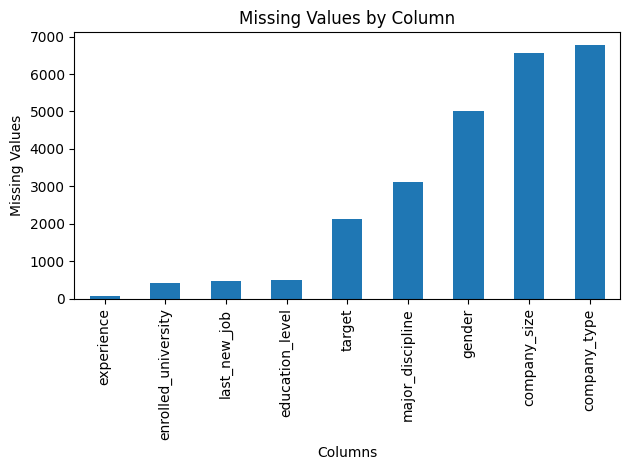

In [10]:
missing_counts = data.isna().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=True)

missing_counts.plot(kind="bar")
plt.ylabel("Missing Values")
plt.xlabel("Columns")
plt.title("Missing Values by Column")
plt.tight_layout()
plt.show()

<Axes: >

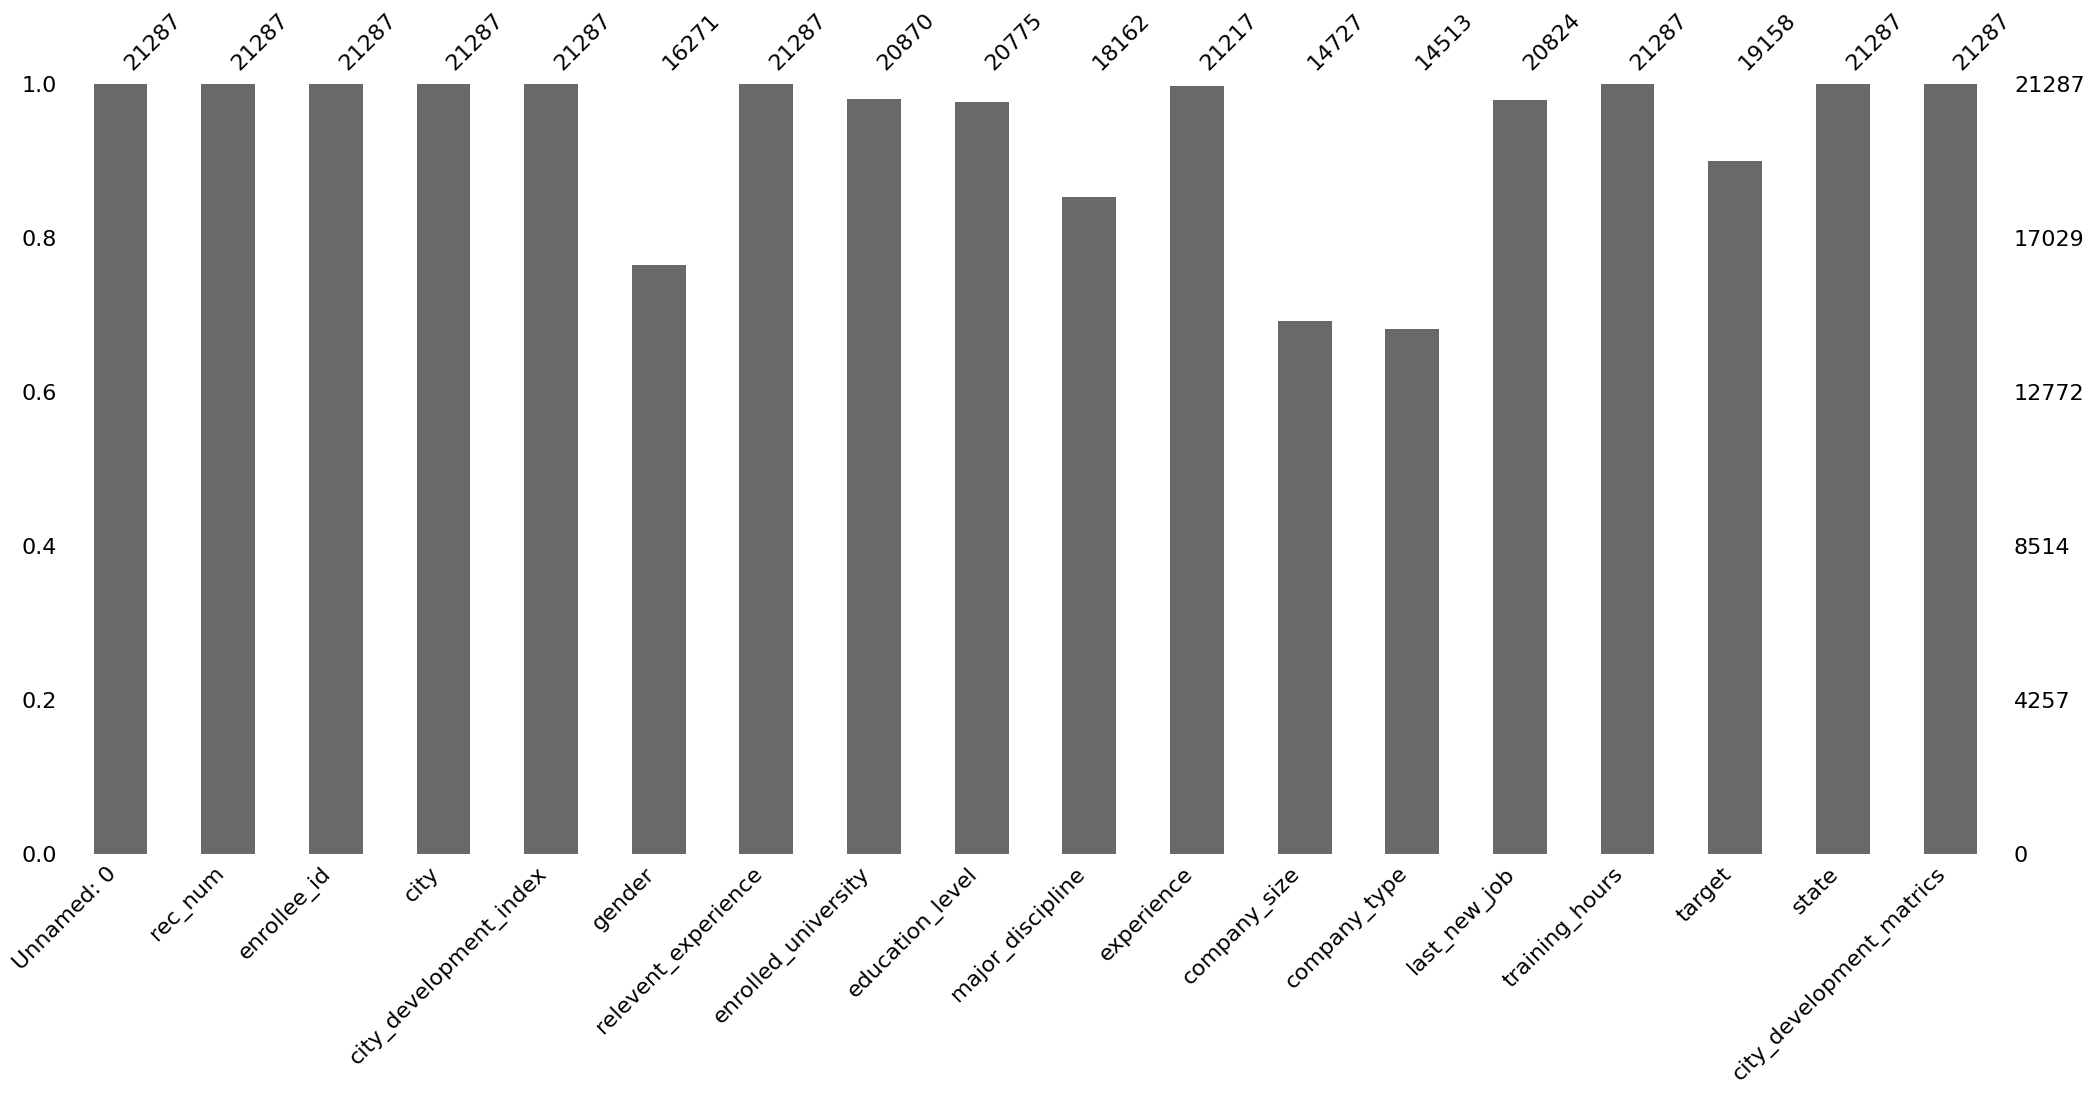

In [12]:
msno.bar(data)

<Axes: >

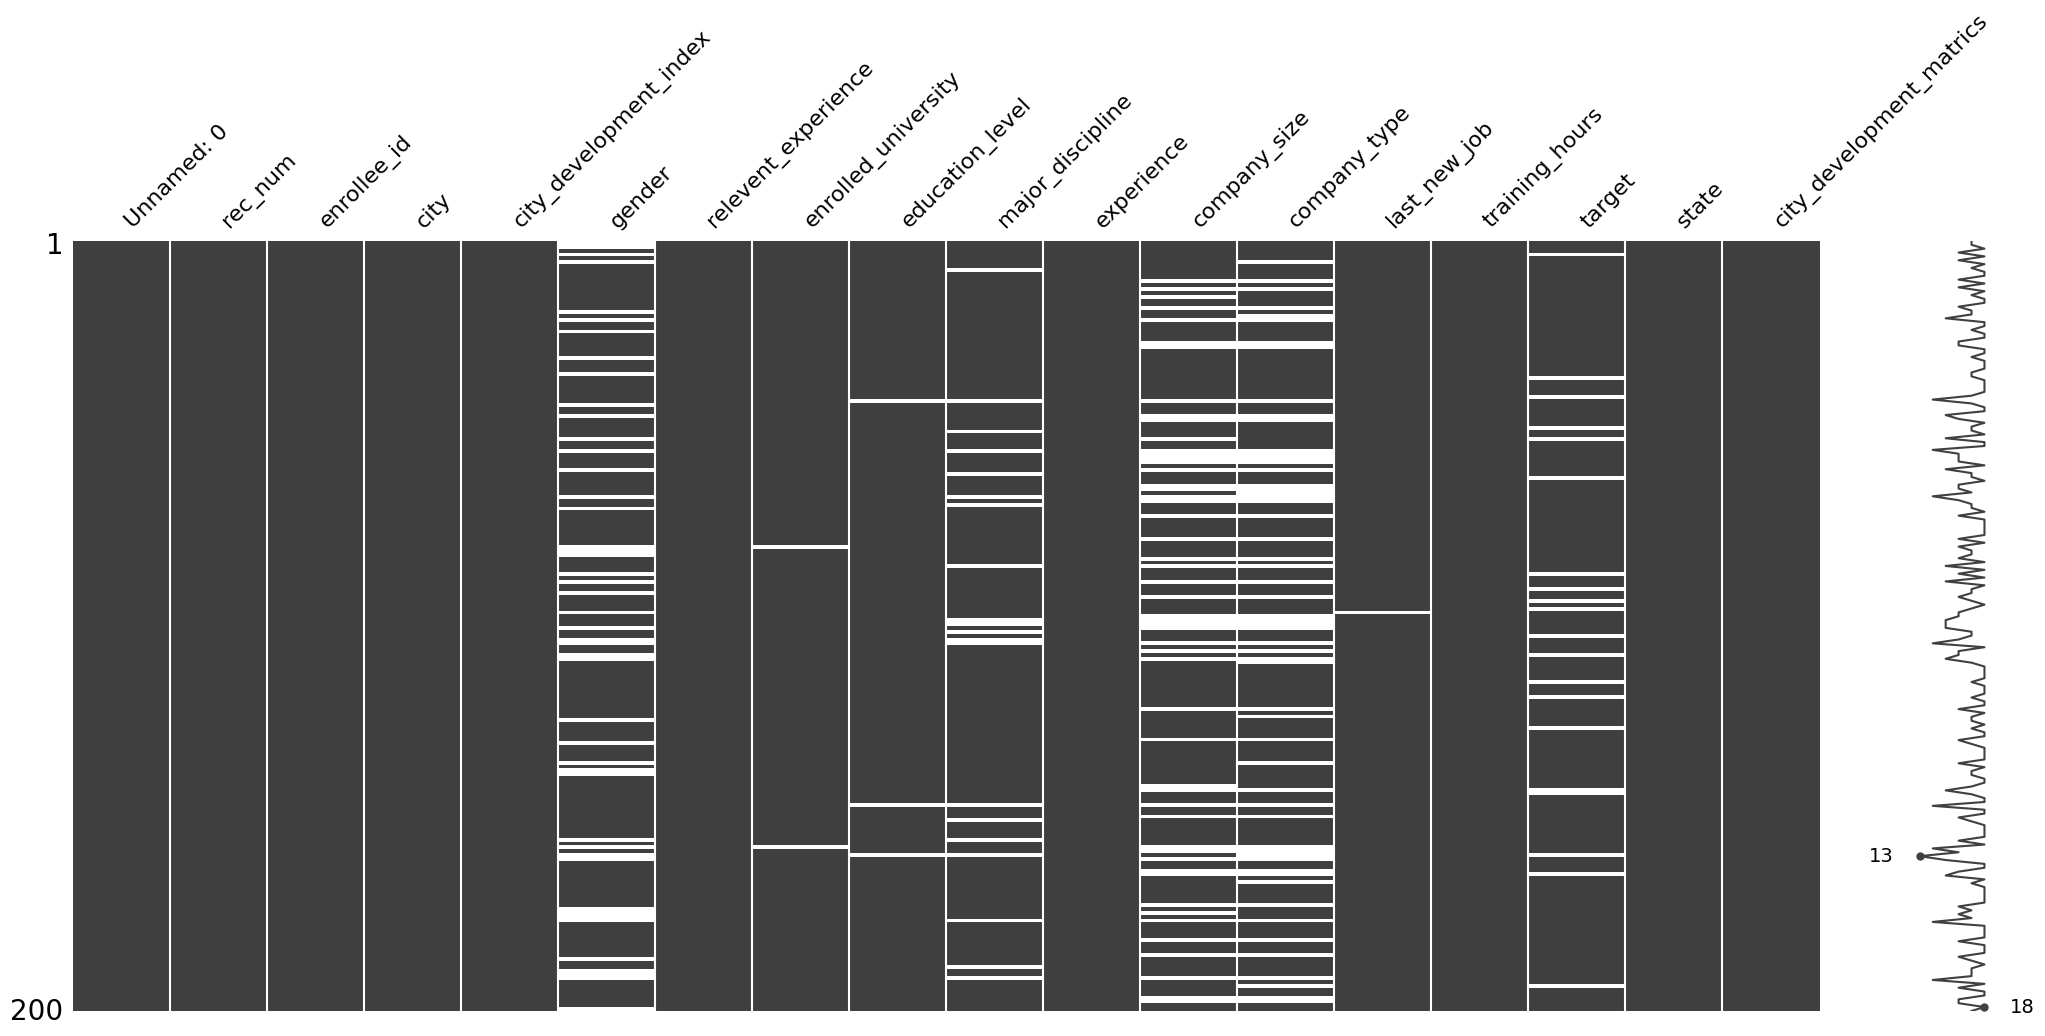

In [14]:
msno.matrix(data.sample(200))

<Axes: >

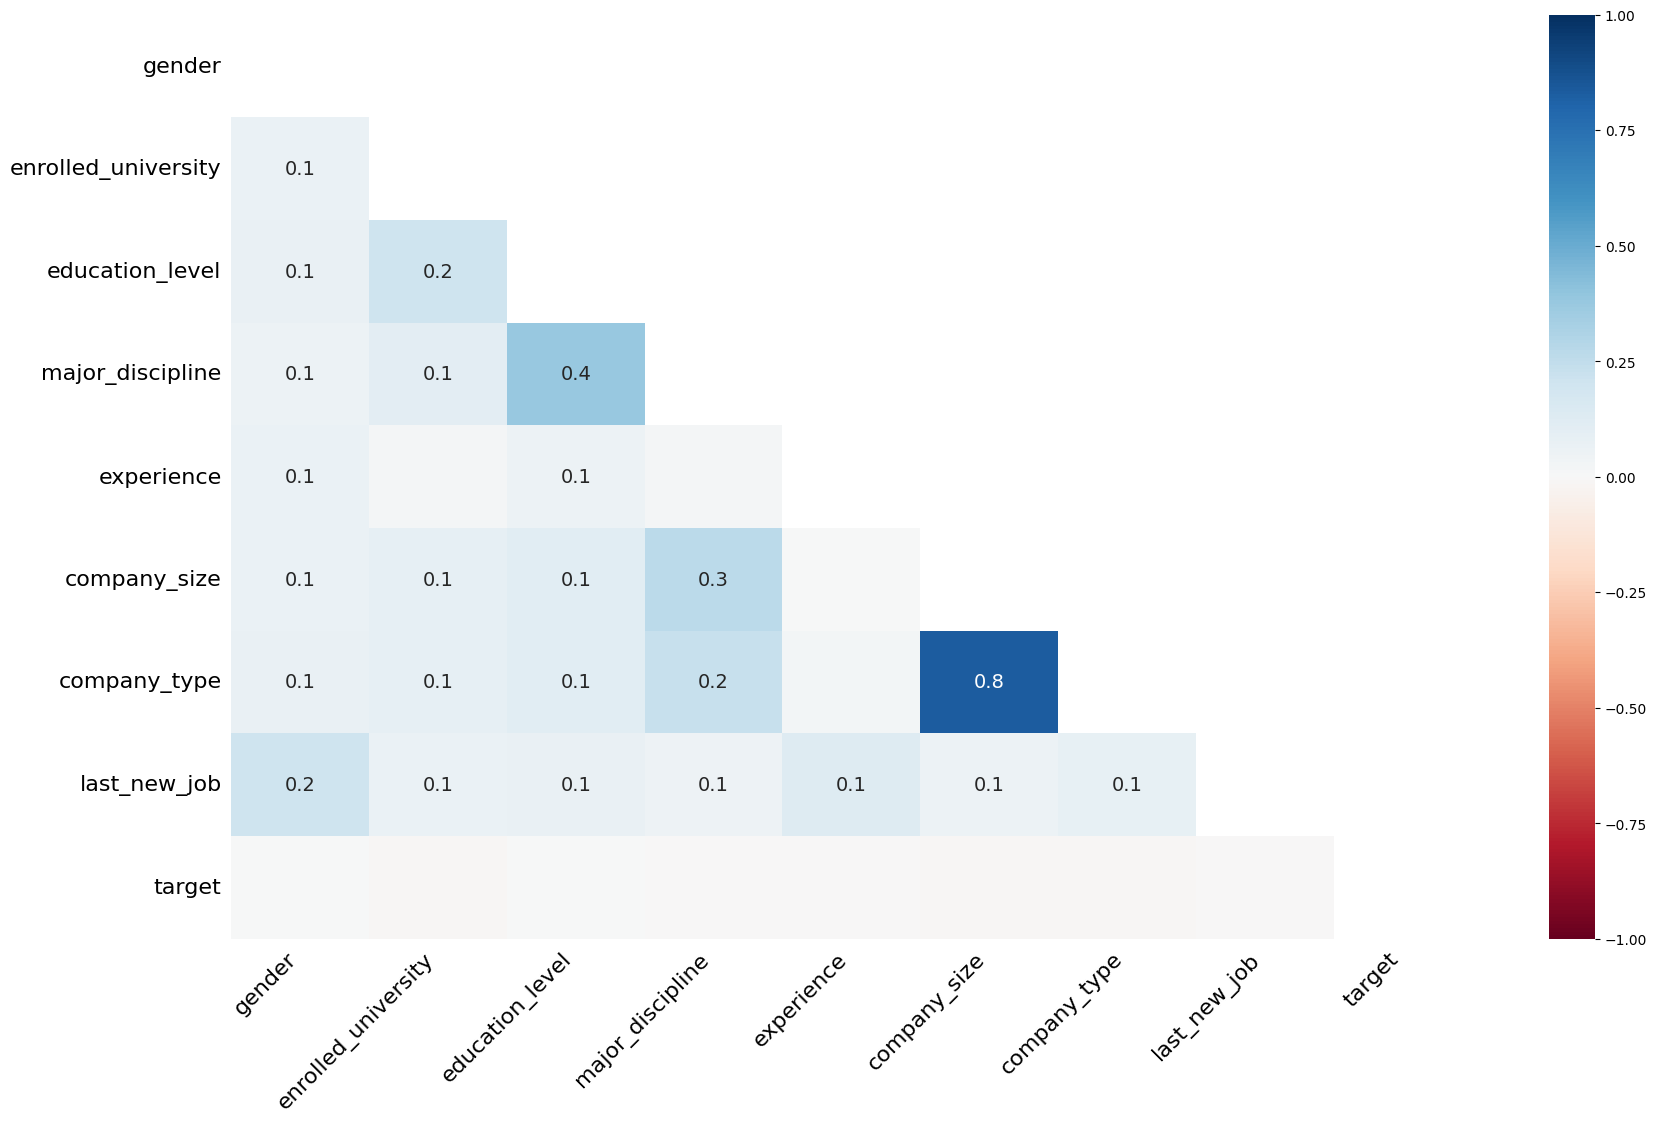

In [15]:
msno.heatmap(data)

From the heatmap we can see a very strong correlation in missing values between the `company_type` and `company_size`. This makes sense as the data are both related to the previous employer (if there was no previous employer, both size and type would be missing). We can see a similar correlation with `major_discipline` and `education_level`. If a candidate does not have an education, neither will appear.

Looking at the "Missing Values by Column", we can see that there are only five columns with a concerning amount of missing data. For our purposes, it is unfortunate that the previous employer data and `target` values are so absent. These likely would be major predictors. The `gender` and `major_discipline` values are likely not as concerning.